In [3]:
#Import libraries
import os
import pandas as pd
import numpy as np

#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [4]:
#Set working directory
os.chdir("G:/PythonTraining")
print(os.getcwd())

G:\PythonTraining


In [241]:
#Read the csv file
day = pd.read_csv("day.csv", sep=",")

In [6]:
#Explore the data
print(day.head())

#Get the data types of variables
print(day.dtypes)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant         int64
dted

In [242]:
#Create a new dataframe containing required columns and creating new columns
df = day.copy()
df.head()

#Create new columns
df['temp_DeNormalized'] = day['temp'] * 39
df['feel_temp_DeNormalized'] = day['atemp'] * 50
df['windspeed_DeNormalized'] = day['windspeed'] * 67
df['hum_DeNormalized'] = day['hum'] * 100

df['season_Cat'] = day['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
df['yr_Cat'] = day['yr'].replace([0,1],["2011","2012"])
df['holiday_Cat'] = day['holiday'].replace([0,1],["Working day","Holiday"])
df['weathersit_Cat'] = day['weathersit'].replace([1,2,3,4],["Clear","Cloudy/Mist","Rain/Snow/Fog","Heavy Rain/Snow/Fog"])

In [243]:
#Correcting Datatypes
df['weathersit'] = df['weathersit'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['yr'] = df['yr'].astype('category')
df['season'] = df['season'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['season_Cat'] = df['season_Cat'].astype('category')
df['yr_Cat'] = df['yr_Cat'].astype('category')
df['holiday_Cat'] = df['holiday_Cat'].astype('category')
df['weathersit_Cat'] = df['weathersit_Cat'].astype('category')

#df.dtypes

In [9]:
#Check the count of values of categorical variables
print(df.workingday.value_counts())
print(df.weekday.value_counts())
print(df.mnth.value_counts())
print(df.yr_Cat.value_counts())
print(df.holiday_Cat.value_counts())
print(df.weathersit_Cat.value_counts())

1    500
0    231
Name: workingday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
2012    366
2011    365
Name: yr_Cat, dtype: int64
Working day    710
Holiday         21
Name: holiday_Cat, dtype: int64
Clear            463
Cloudy/Mist      247
Rain/Snow/Fog     21
Name: weathersit_Cat, dtype: int64


In [64]:
#Check if there are missing values
df.isnull().sum()

instant                   0
dteday                    0
season                    0
yr                        0
mnth                      0
holiday                   0
weekday                   0
workingday                0
weathersit                0
temp                      0
atemp                     0
hum                       0
windspeed                 0
casual                    0
registered                0
cnt                       0
temp_DeNormalized         0
feel_temp_DeNormalized    0
windspeed_DeNormalized    0
hum_DeNormalized          0
season_Cat                0
yr_Cat                    0
holiday_Cat               0
weathersit_Cat            0
dtype: int64

C:\Users\Vinod\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


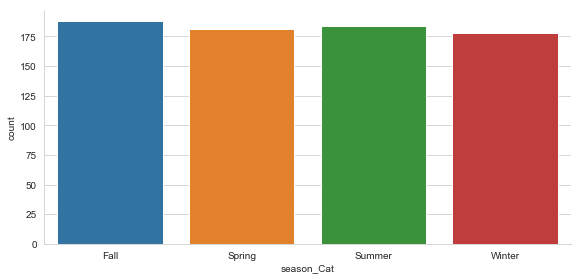

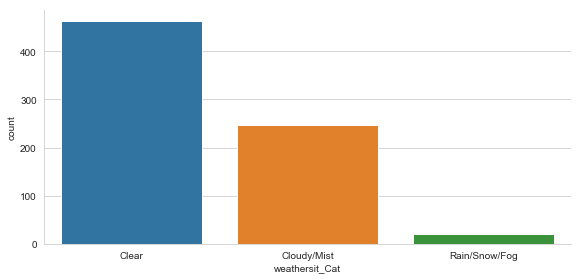

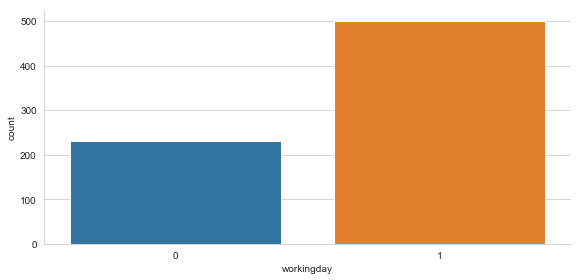

In [244]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.catplot(data=df, x='season_Cat', kind= 'count',size=4,aspect=2)
sns.catplot(data=df, x='weathersit_Cat', kind= 'count',size=4,aspect=2)
sns.catplot(data=df, x='workingday', kind= 'count',size=4,aspect=2)


Text(0.5, 0, 'Celcius')

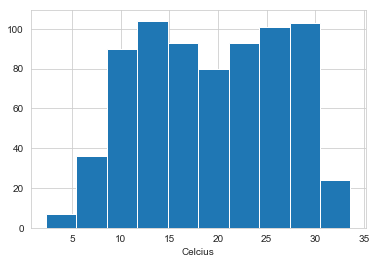

In [245]:
#Histogram Temprature
plt.hist(data=df, x='temp_DeNormalized',label='Temperature')
plt.xlabel('Celcius')

Text(0.5, 0, 'Celcius-Feel Temperature')

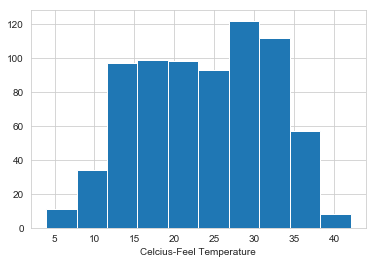

In [250]:
#Histogram Feel Temprature
plt.hist(data=df, x='feel_temp_DeNormalized',label='Feel Temperature')
plt.xlabel('Celcius-Feel Temperature')

Text(0.5, 0, 'windspeed')

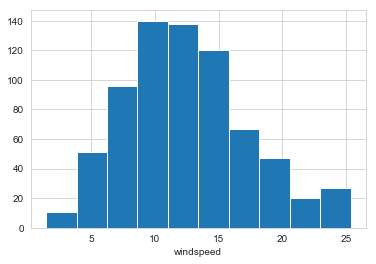

In [256]:
#Histogram windspeed
plt.hist(data=df, x='windspeed_DeNormalized',label='Feel Temperature')
plt.xlabel('windspeed')

Text(0.5, 0, 'Humidity')

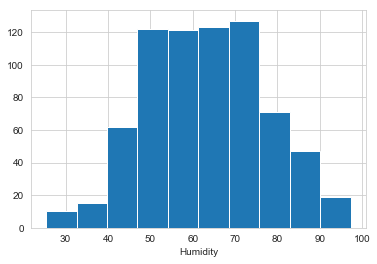

In [255]:
#Histogram Humidity
plt.hist(data=df, x='hum_DeNormalized', label='Temperature')
plt.xlabel('Humidity')

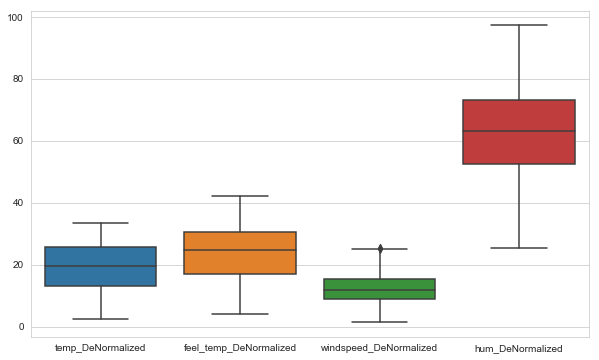

In [257]:
#Outlier detection Boxplpt
sns.boxplot(labels=[['Temp','Feel','Windspeed','Humidity']],data=df[['temp_DeNormalized','feel_temp_DeNormalized','windspeed_DeNormalized','hum_DeNormalized']])
fig=plt.gcf()
fig.set_size_inches(10,6)

In [150]:
df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [253]:
#Outliers Removal - Humidity
q75, q25 = np.percentile(df['hum_DeNormalized'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df = df.drop(df[df.iloc[:,19] < min].index)
df = df.drop(df[df.iloc[:,19] > max].index)

73.02085 52.0
21.020849999999996
20.468725000000006
104.55212499999999


In [254]:
#Outliers Removal - windspeed
q75, q25 = np.percentile(df['windspeed_DeNormalized'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df = df.drop(df[df.iloc[:,18] < min].index)
df = df.drop(df[df.iloc[:,18] > max].index)

15.624668 9.041649999999999
6.583018000000001
-0.8328770000000016
25.499195


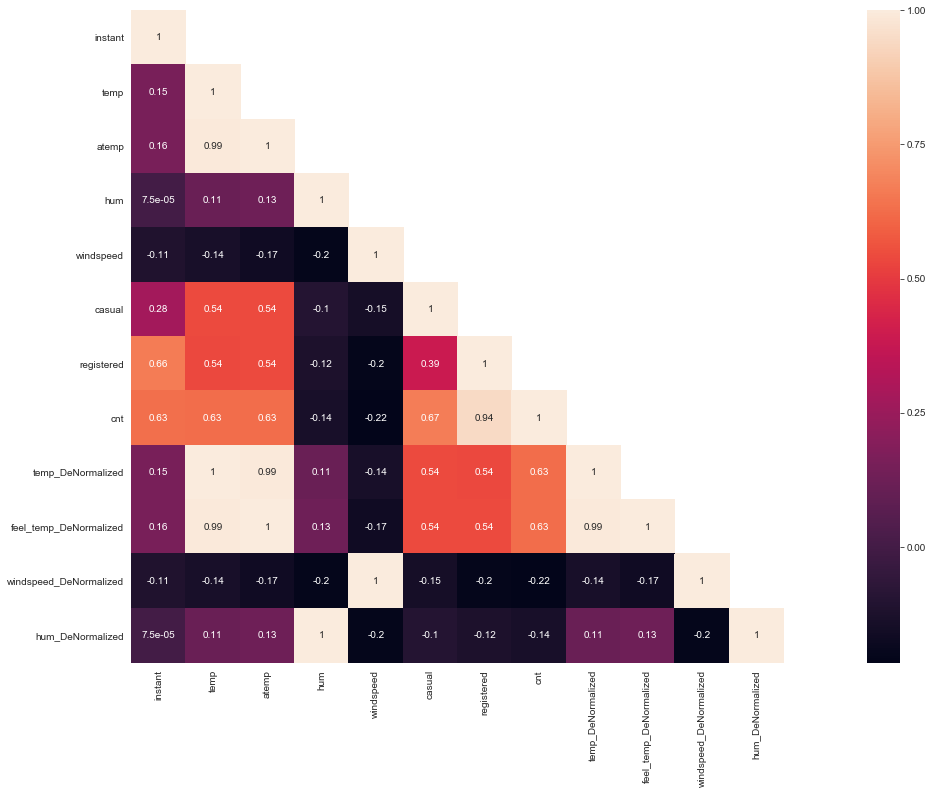

In [73]:
#Collinearity Detection - corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Text(0, 0.5, 'Count of bikes')

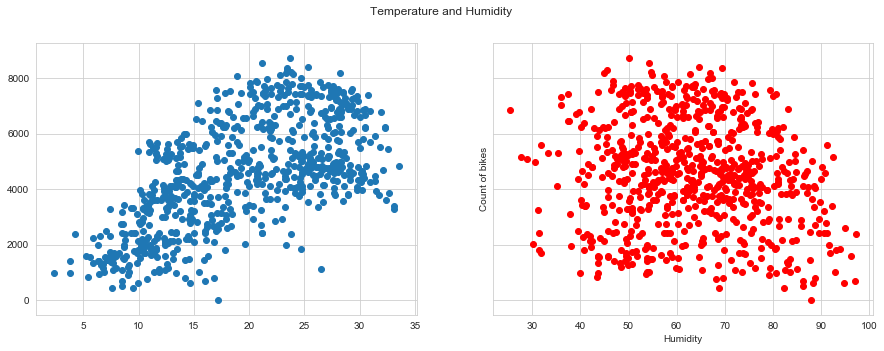

In [258]:
#Check the distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='temp_DeNormalized', y='cnt')
axs[1].scatter(data=df, x='hum_DeNormalized', y='cnt', color = 'red')
fig.suptitle('Temperature and Humidity')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

Text(0, 0.5, 'Count of bikes')

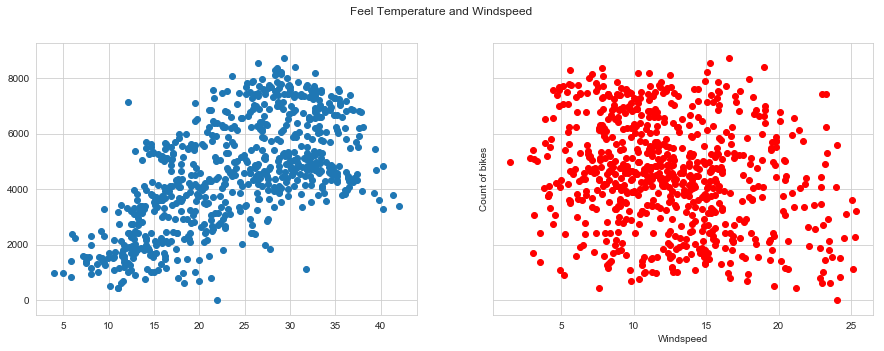

In [77]:
#Check the distribution of Feel Temperature and Windspeed against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='feel_temp_DeNormalized', y='cnt')
axs[1].scatter(data=df, x='windspeed_DeNormalized', y='cnt', color = 'red')
fig.suptitle('Feel Temperature and Windspeed')
plt.xlabel("Windspeed")
plt.ylabel("Count of bikes")

In [259]:
df = df.drop(columns=['holiday','instant','dteday','atemp','casual','registered','temp_DeNormalized','feel_temp_DeNormalized',
                      'windspeed_DeNormalized','hum_DeNormalized','season_Cat','yr_Cat','holiday_Cat','weathersit_Cat'])

#Decision Tree 
#MAPE: 22.63%
#Accuracy: 77.37%

In [115]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [260]:
train,test = train_test_split(df, test_size = 0.2)

In [261]:
dt_model = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [262]:
dt_predictions = dt_model.predict(test.iloc[:,0:9])

In [218]:
df_dt = pd.DataFrame({'actual': test.iloc[:,9], 'pred': dt_predictions})
df_dt.head()

,actual,pred
668,1096,3959.0
711,5319,5035.0
520,6998,7641.0
354,2660,2162.0
130,4182,5115.0


In [219]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [220]:
MAPE(test.iloc[:,9],dt_predictions)

0.22634651348720572

#Random Forest
#MAPE: 19.12%
#Accuracy:79.82%

In [221]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [222]:
#Train the model
rf_model = RandomForestRegressor(n_estimators=500,random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [223]:
#Predict the results of test data
rf_predictions = rf_model.predict(test.iloc[:,0:9])

In [224]:
#Create a dataframe for actual values and predicted values
df_rf = pd.DataFrame({'actual': test.iloc[:,9], 'pred': rf_predictions})
df_rf.head()

,actual,pred
668,1096,4297.520
711,5319,5087.474
520,6998,7094.368
354,2660,2397.596
130,4182,4885.306


In [225]:
#Calculate MAPE
MAPE(test.iloc[:,9],rf_predictions)
#MAPE: 13.10%
#Accuracy:86.90%

0.19123161103055286

#Linear Regression
#MAPE:24.20
#Accuracy: 75.80%
#Adjusted r2: 0.967
#F-stat: 1883.

In [226]:
#import libraries for Linear regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [227]:
#Train the model
lr_model = sm.OLS(train.iloc[:,9].astype(float), train.iloc[:,0:9].astype(float)).fit()

In [228]:
#Check the summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1883.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):                        0.00
Time:                        19:56:18   Log-Likelihood:                         -4698.0
No. Observations:                 573   AIC:                                      9414.
Df Residuals:                     564   BIC:                                      9453.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       580.0952     62.527      9.277      0.000     457.281     702.910
yr          2195.1343     72.782     30.160      0.000    2052.177    2338.091
mnth         -56.9320     19.713     -2.888      0.004     -95.652     -18.212
weekday       96.0833     18.244      5.266      0.000      60.248     131.918
workingday   158.6162     79.648      1.991      0.047       2.173     315.060
weathersit  -701.1315     92.309     -7.595      0.000    -882.444    -519.819
temp        5494.7929    219.886     24.989      0.000    5062.897    5926.689
hum          491.1804    303.319      1.619      0.106    -104.592    1086.953
windspeed   -698.8676    441.020     -1.585      0.114   -1565.109     167.374
==============================================================================
Omnibus:                       61.515   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.178
Skew:                          -0.656   Prob(JB):                     9.76e-26
Kurtosis:                       4.761   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
#Predict the results of test data
lr_predictions = lr_model.predict(test.iloc[:,0:9])

In [230]:
##Create a dataframe for actual values and predicted values
df_lr = pd.DataFrame({'actual': test.iloc[:,9], 'pred': lr_predictions})
df_lr.head()

,actual,pred
668,1096,4899.64
711,5319,4662.18
520,6998,5890.62
354,2660,1561.98
130,4182,3828.75


In [231]:
#Calclulate MAPE
MAPE(test.iloc[:,9],lr_predictions)
#MAPE:24.20
#Accuracy: 75.80%
#Adjusted r2: 0.967
#F-stat: 1883.

0.24240780971731254

In [238]:
#Calclulate MAPE
MAPE(test_lr.iloc[:,0],lr_predictions)
#MAPE:17.07%
#Accuracy: 82.93%
#Adjusted r2: 0.852
#F-stat: 122.7

0.22046839653616976